In [1]:
# Import dependencies
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Male vs. Female Vet Suicide Rates

In [2]:
#Read in veteran suicide by sex file
vet_suicide_sex = "./Veteran Suicides by Sex.csv"
vet_suicide_df = pd.read_csv(vet_suicide_sex)
vet_suicide_df.head()

,Year,Region,State,Total,Male,Female
0,2005,Midwest,Illinois,190,180,10
1,2005,Midwest,Indiana,142,130,12
2,2005,Midwest,Iowa,65,60,5
3,2005,Midwest,Kansas,70,60,10
4,2005,Midwest,Michigan,187,180,7


In [3]:
#Grouped veteran suicide sex data by region and calculated sum of female
#and male suicides for each region
vet_suicide_by_region=vet_suicide_df.groupby(["Region"]).sum()
vet_suicide_by_region

,Year,Total,Male,Female
Region,,,,
Midwest,289512,15489,14168,1321
Northeast,217134,8658,7850,808
South,410142,29996,28020,1976
West,313638,18874,17370,1504


<IPython.core.display.Javascript object>


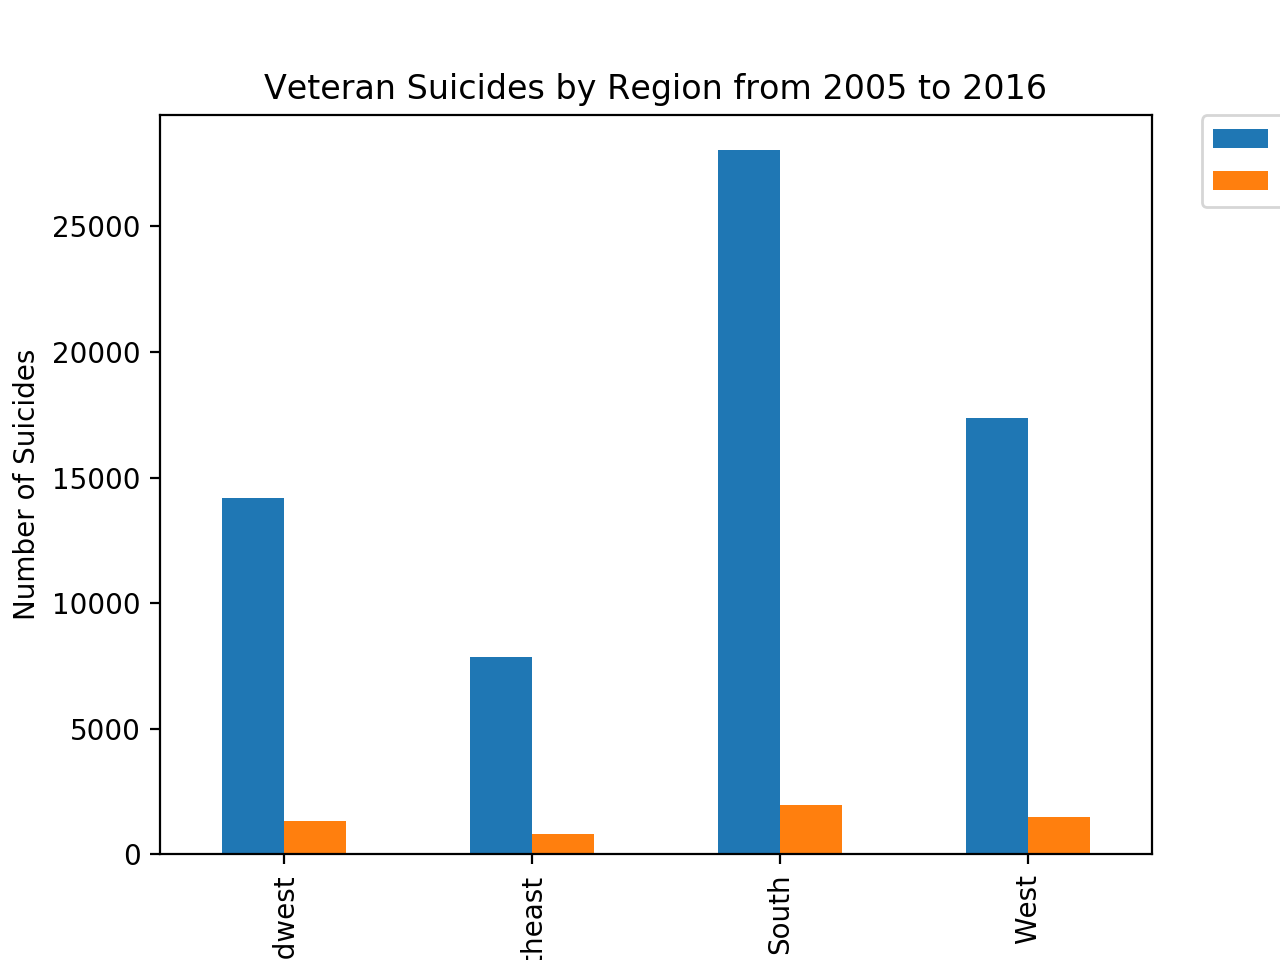

In [4]:
#Create bar graph

Region=vet_suicide_by_region.index
vet_male_female_comp_byregion=vet_suicide_by_region[['Male',
                    'Female']].plot(kind='bar')

#Incorporate graph features
plt.ylabel('Number of Suicides')
plt.xlabel('Region')
plt.title('Veteran Suicides by Region from 2005 to 2016')

#Create legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Save graph as a png
plt.savefig('Fig Bar Chart- Veteran Suicides by Region from 2005 to 2016',
            bbox_inches='tight')

<IPython.core.display.Javascript object>


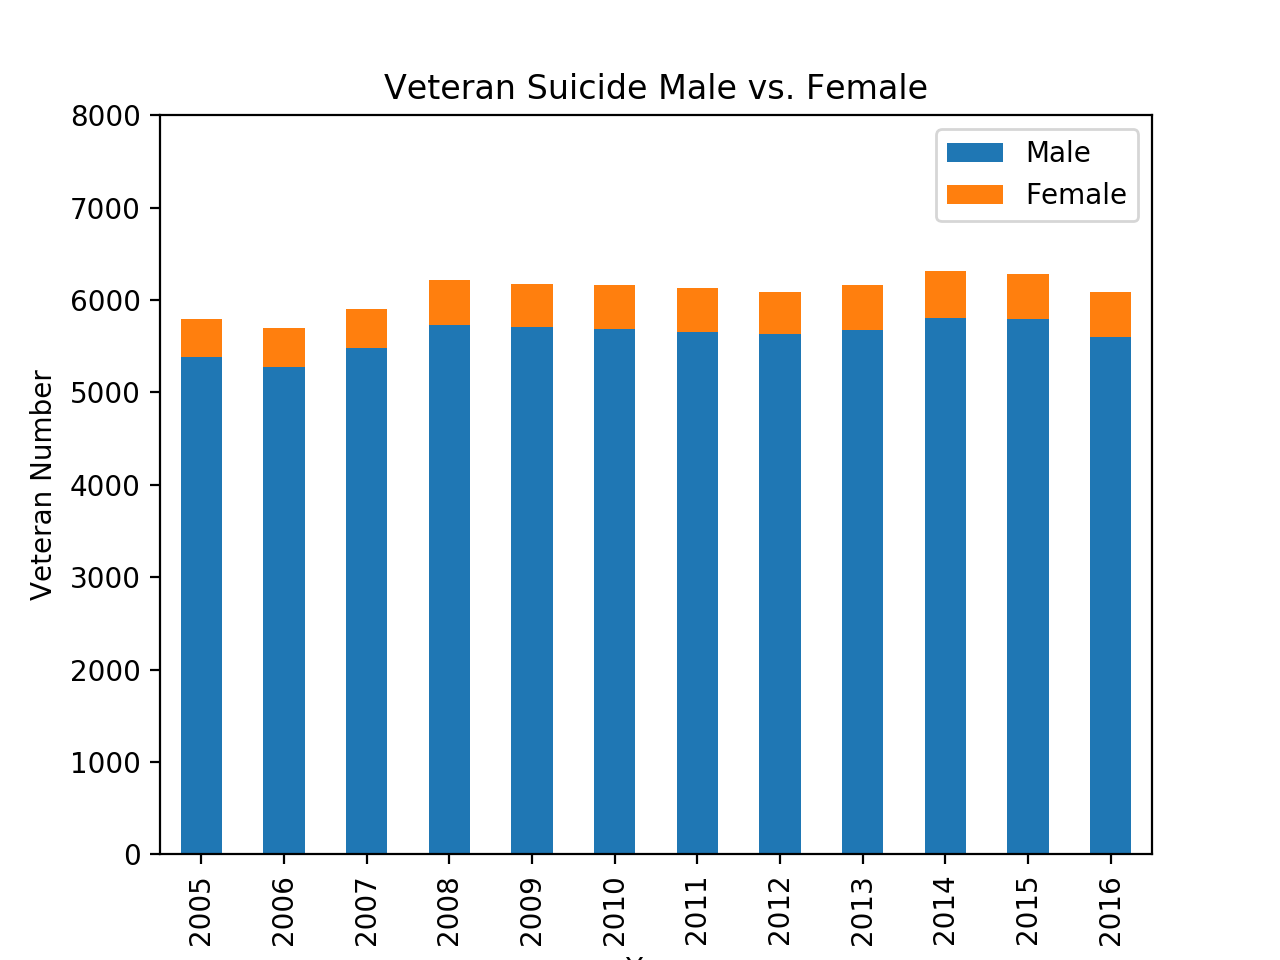

In [6]:
#Grouped veteran suicide sex data by year and calculated sum of female
#and male suicides for each year

vet_groupby_sum_1 = vet_suicide_df.groupby('Year').sum()
ax = vet_groupby_sum_1[['Male','Female']].plot(kind='bar', stacked=True)
ax.set(title = 'Veteran Suicide Male vs. Female',
       xlabel = 'Year',
       ylabel = 'Veteran Number',
       ylim = (0,8000))
ax.legend(loc = 'best', frameon=True)


# Save the Figure
plt.savefig("./Veteran Suicide Male vs. Female.png",bbox_inches='tight')



# Suicide by Age (Vet and Civilian)

In [7]:
# Read in suicide by age file
vet_suicide_age = "./Suicides by Age.csv"
vet_age_df = pd.read_csv(vet_suicide_age)
vet_age_df.head()

,Year,"Geographic Region, Based on state of death",State of Death,Age Group,Veteran Suicides,"Veteran Suicide Rate per 100,000",General Population Suicides,"General Population Rate per 100,000"
0,2005,Total U.S.,Total U.S.,Total,"5,797",23.9,"31,610",14.7
1,2005,Total U.S.,Total U.S.,18-34,544,25.2,"8,455",13.1
2,2005,Total U.S.,Total U.S.,35-54,"2,063",29.0,"13,541",15.9
3,2005,Total U.S.,Total U.S.,55-74,"1,868",18.7,"6,554",13.5
4,2005,Total U.S.,Total U.S.,75+,"1,319",26.3,"3,060",18.7


In [8]:
# Extract rows where state of death = Total U.S.
vet_age_df2 = vet_age_df.loc[vet_age_df["State of Death"].isin(["Total U.S."])]
vet_age_df2.head(20)
list(vet_age_df2)

['Year',
 'Geographic\nRegion,\nBased on\nstate of\ndeath',
 'State of Death',
 'Age\nGroup',
 'Veteran\nSuicides',
 'Veteran\nSuicide\nRate\nper\n100,000',
 'General\nPopulation\nSuicides',
 'General\nPopulation\nRate per\n100,000']

In [9]:
# Veteran Age Group Comparison (Total)
# Age Group != total
vet_age_df3 = vet_age_df2.loc[vet_age_df2["Age\nGroup"]!="Total",:]

vet_age_df3.head()

,Year,"Geographic Region, Based on state of death",State of Death,Age Group,Veteran Suicides,"Veteran Suicide Rate per 100,000",General Population Suicides,"General Population Rate per 100,000"
1,2005,Total U.S.,Total U.S.,18-34,544,25.2,"8,455",13.1
2,2005,Total U.S.,Total U.S.,35-54,"2,063",29.0,"13,541",15.9
3,2005,Total U.S.,Total U.S.,55-74,"1,868",18.7,"6,554",13.5
4,2005,Total U.S.,Total U.S.,75+,"1,319",26.3,"3,060",18.7
281,2006,,Total U.S.,18-34,482,22.7,"8,453",12.3


In [10]:
#create a new df with the data need needed
vet_age_df4 =  vet_age_df3.drop(columns = ['Geographic\nRegion,\nBased on\nstate of\ndeath',
                                           'State of Death',
                                           'Veteran\nSuicides',
                                           'General\nPopulation\nSuicides'])
vet_age_df4.head()

,Year,Age Group,"Veteran Suicide Rate per 100,000","General Population Rate per 100,000"
1,2005,18-34,25.2,13.1
2,2005,35-54,29.0,15.9
3,2005,55-74,18.7,13.5
4,2005,75+,26.3,18.7
281,2006,18-34,22.7,12.3


In [11]:
#group by age group and year
vet_age_df5 = vet_age_df4.groupby(['Year','Age\nGroup']).sum()
vet_age_df5.head()

Veteran\nSuicide\nRate\nper\n100,000  \
Year Age\nGroup                                        
2005 18-34                                      25.2   
     35-54                                      29.0   
     55-74                                      18.7   
     75+                                        26.3   
2006 18-34                                      22.7   

                General\nPopulation\nRate per\n100,000  
Year Age\nGroup                                         
2005 18-34                                        13.1  
     35-54                                        15.9  
     55-74                                        13.5  
     75+                                          18.7  
2006 18-34                                        12.3

In [12]:
#Reset index for data frame and determine data type
vet_age_df5.reset_index().head()
vet_age_df5.dtypes

Veteran\nSuicide\nRate\nper\n100,000      object
General\nPopulation\nRate per\n100,000    object
dtype: object

In [13]:
#convert all DataFrame columns to the int64 dtype
vet_age_df5 = vet_age_df5.astype(float)

In [14]:
# Minor Data Munging to Re-Format the Data Frames

vet_age_df6 = pd.pivot_table(vet_age_df5, index='Year', columns='Age\nGroup', 
                             values='Veteran\nSuicide\nRate\nper\n100,000')
vet_age_df6.head(20)

Age Group,18-34,35-54,55-74,75+
Year,,,,
2005,25.2,29.0,18.7,26.3
2006,22.7,28.8,19.8,25.9
2007,25.0,30.4,20.8,27.3
2008,26.8,32.3,23.1,27.4
2009,26.4,32.0,23.0,29.6
2010,28.0,32.3,23.5,29.0
2011,30.6,32.8,23.5,28.5
2012,32.3,32.8,23.6,28.6
2013,37.1,32.0,24.9,28.6


<IPython.core.display.Javascript object>


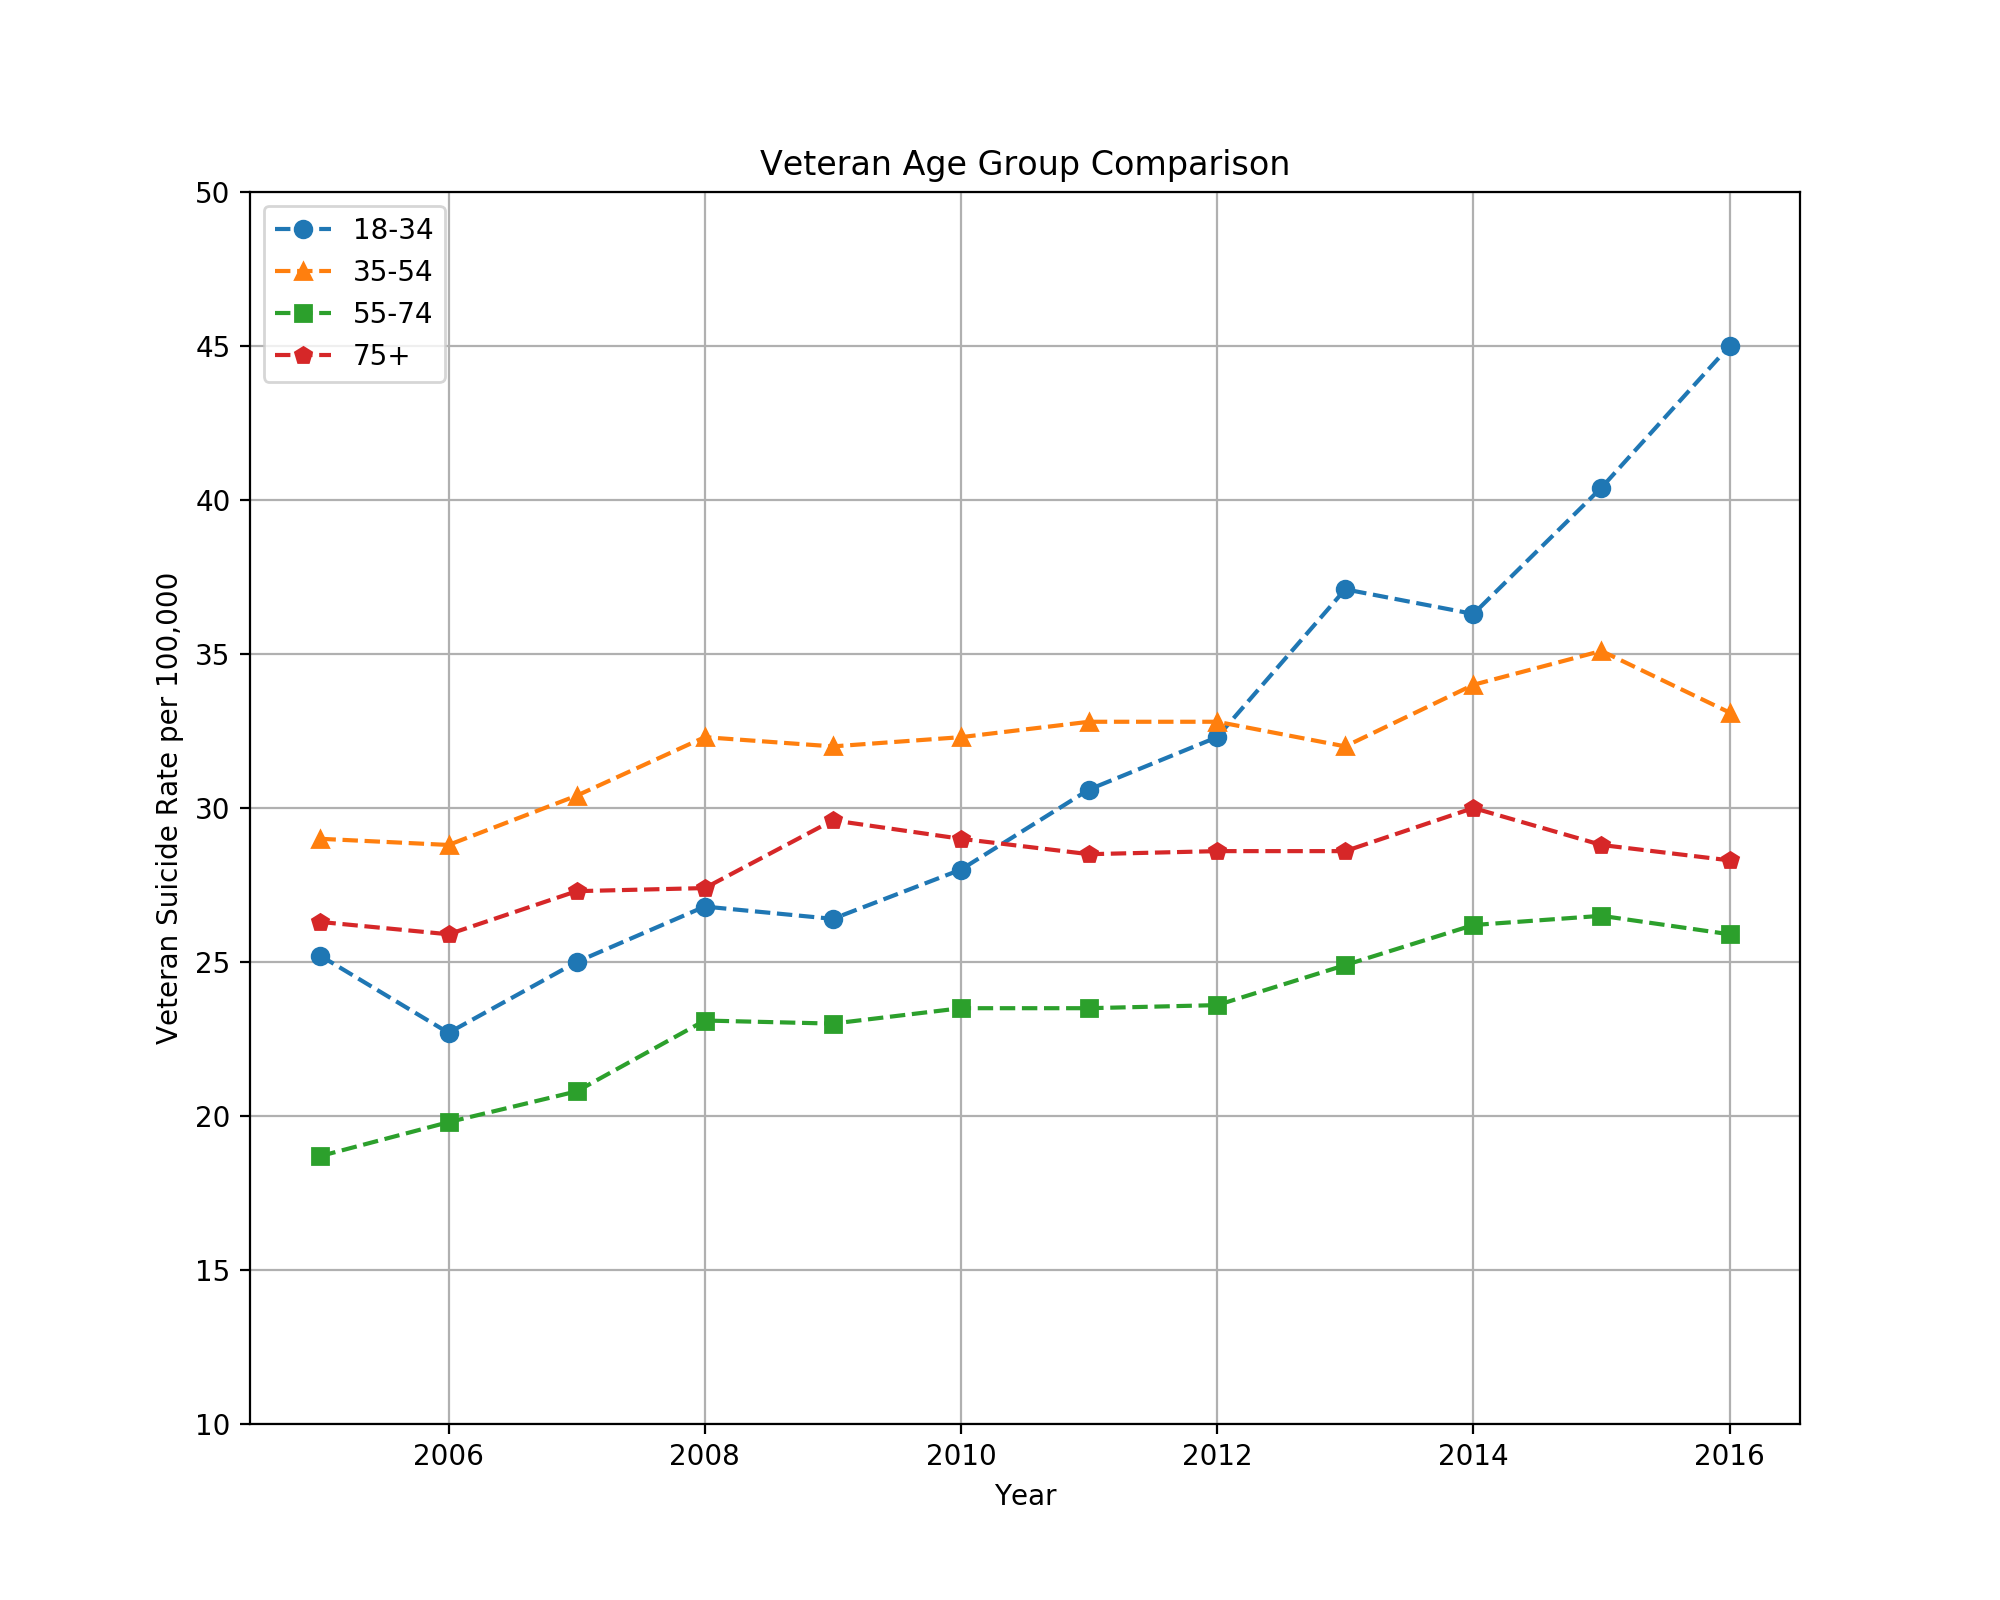

In [16]:
# Generate the plot for veteran age group comparison 

Timepoint = vet_age_df6.index
plt.figure(figsize=(10,8))
plt.plot(Timepoint, vet_age_df6['18-34'], marker ='o', linestyle='--', label="18-34")
plt.plot(Timepoint, vet_age_df6['35-54'], marker ='^', linestyle='--', label="35-54")
plt.plot(Timepoint, vet_age_df6['55-74'], marker ='s', linestyle='--', label="55-74")
plt.plot(Timepoint, vet_age_df6['75+'], marker ='p', linestyle='--', label="75+")
plt.gca().set(xlabel = 'Year', ylabel = 'Veteran Suicide Rate per 100,000',
              title = 'Veteran Age Group Comparison',ylim=(10,50))
plt.legend(loc = 'best', frameon=True)
plt.grid()

# Save the Figure
# Save and display the chart
plt.savefig("./Veteran Age Group Comparison.png")

In [17]:
vet_age_df7 = pd.pivot_table(vet_age_df5, index='Year', columns='Age\nGroup', 
                             values='General\nPopulation\nRate per\n100,000')
vet_age_df7.head(20)

Age Group,18-34,35-54,55-74,75+
Year,,,,
2005,13.1,15.9,13.5,18.7
2006,12.3,16.1,13.8,16.0
2007,12.7,16.7,14.4,16.1
2008,12.7,17.3,15.3,15.9
2009,12.5,17.8,15.7,15.7
2010,13.5,17.9,16.0,16.3
2011,14.0,18.1,16.0,16.6
2012,14.1,18.4,16.5,17.1
2013,14.1,18.1,16.9,17.6


<IPython.core.display.Javascript object>


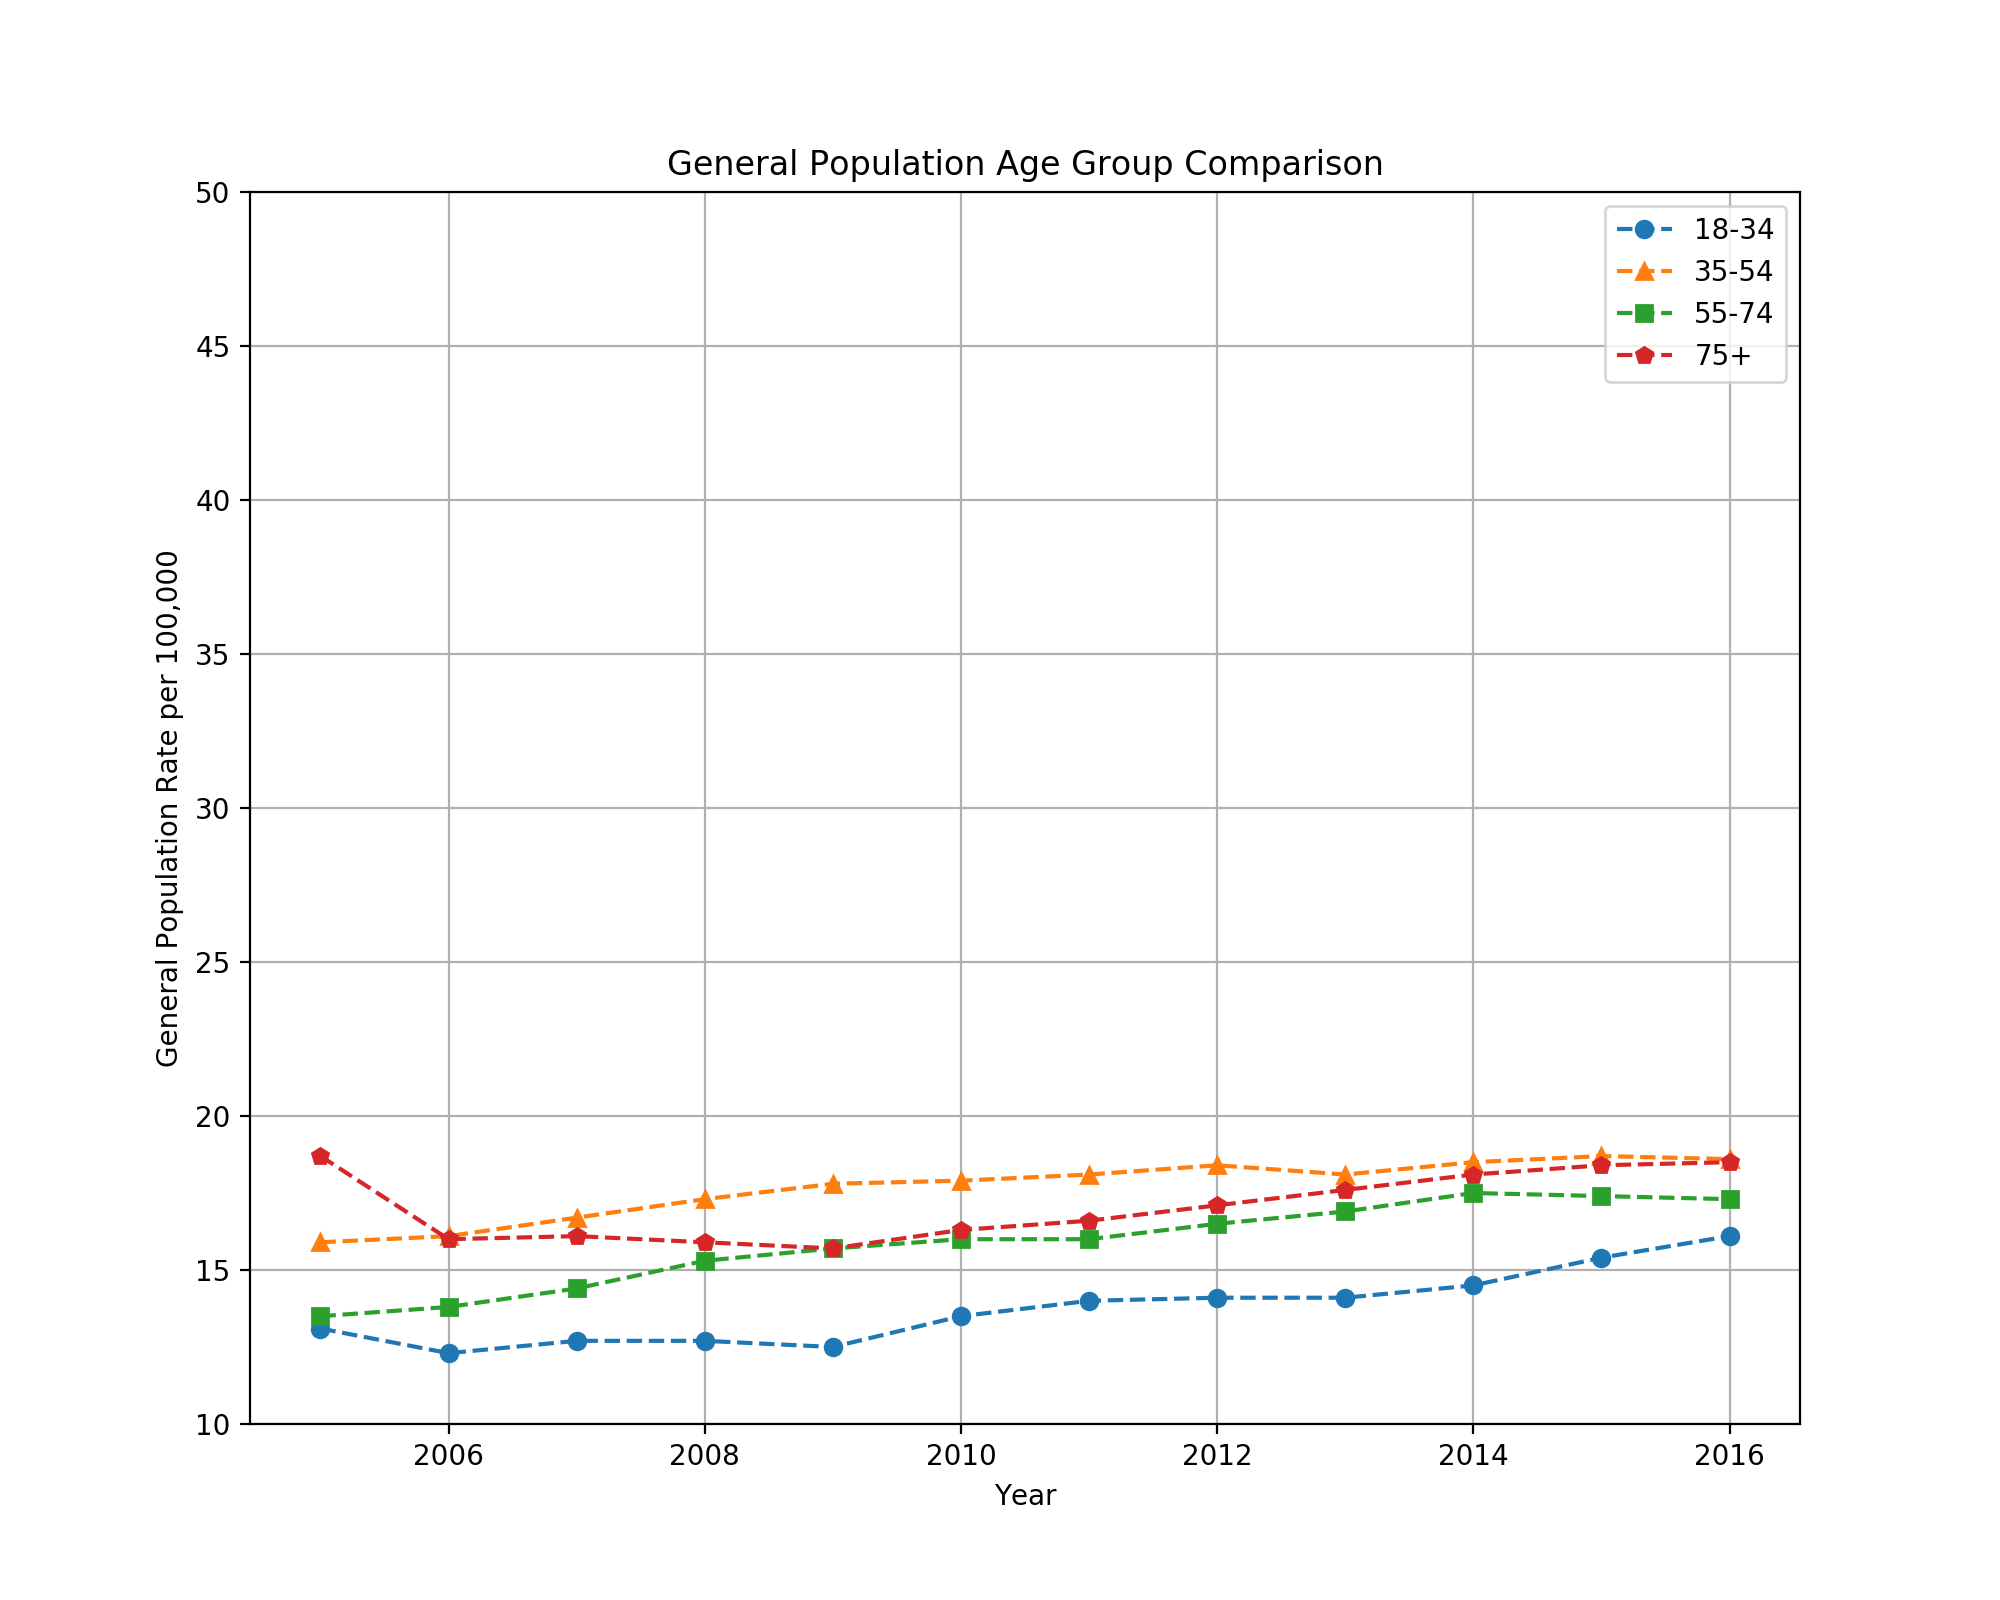

In [18]:
# Generate the plot for general population age group comparison 

plt.figure(figsize=(10,8))
plt.plot(Timepoint, vet_age_df7['18-34'], marker ='o', linestyle='--', label="18-34")
plt.plot(Timepoint, vet_age_df7['35-54'], marker ='^', linestyle='--', label="35-54")
plt.plot(Timepoint, vet_age_df7['55-74'], marker ='s', linestyle='--', label="55-74")
plt.plot(Timepoint, vet_age_df7['75+'], marker ='p', linestyle='--', label="75+")
plt.gca().set(xlabel = 'Year', ylabel = 'General Population Rate per 100,000',
              title = 'General Population Age Group Comparison', ylim=(10,50))
plt.legend(loc = 'best', frameon=True)
plt.grid()

# Save the Figure
# Save and display the chart
plt.savefig("./General Population Age Group Comparison.png")

# Suicide Methods

In [19]:
# read in suicide by method file
general_population_suicide_method_C= "./general_population_suicide_methods.csv"
general_population_suicide_method_C_df = pd.read_csv(general_population_suicide_method_C)
general_population_suicide_method_C_df.head()

,Cause of Death,State,Year,Deaths,Total Deaths,Percent
0,Firearm,United States,2005,16589,31610,52.48
1,Suffocation,United States,2005,6740,31610,21.32
2,Poisoning,United States,2005,5683,31610,17.98
3,Fall,United States,2005,671,31610,2.12
4,Cut/pierce,United States,2005,589,31610,1.86


In [20]:
vet_method="./veteran_suicide_methods.csv"
vet_method_df2=pd.read_csv(vet_method)
vet_method_df2.head()

,Year,Geographic Region,State of Death,Group Method,Method,Suicides,Group Percentage
0,2005,Total U.S.,All,Veteran Method,Suffocation,786,13.6
1,2005,Total U.S.,All,Veteran Method,Poisoning,757,13.1
2,2005,Total U.S.,All,Veteran Method,Firearms,"3,925",67.7
3,2005,Total U.S.,All,Veteran Method,Other Suicide,329,5.7
4,2006,Total U.S.,All,Veteran Method,Suffocation,804,14.1


<IPython.core.display.Javascript object>


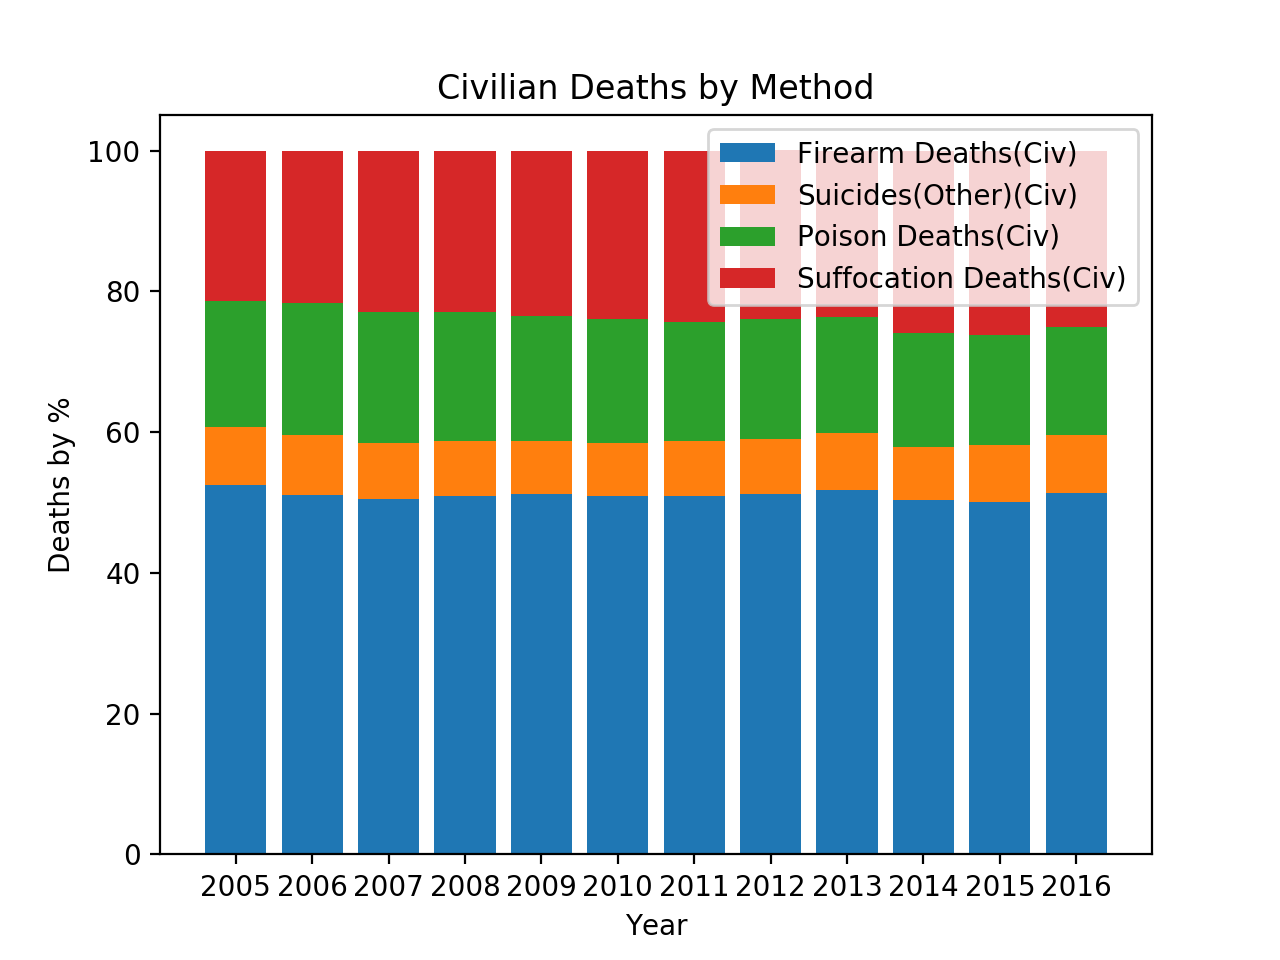

In [21]:
# creating bar graph to show various methods used
# prepare data
years = [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
vetFirearm = np.array([67.7,67.4,65.9,65.5,67.5,67.6,67.2,67.3,68.1,67.1,67.3,69.4])
vetOther = np.array([5.7,5.9,5.7,5.2,5.6,4.9,5.3,5.6,5.4,4.8,5.7,5.1])
vetPoison = np.array([13.1,12.6,13.0,13.5,12.4,13.1,12.1,11.8,11.2,11.6,11.2,10.6])
vetSuffocation = np.array([13.6,14.1,15.4,15.8,14.5,14.4,15.3,15.3,15.3,16.6,15.8,15])
civFirearm = np.array([52.48,51.04,50.44,50.97,51.15,50.91,50.91,51.25,51.84,50.28,50.13,51.36])
civPoison = np.array([17.98,18.73,18.66,18.22,17.73,17.53,16.96,16.97,16.51,16.25,15.73,15.25])
civOther = np.array([8.22,8.52,7.96,7.81,7.57,7.56,7.78,7.78,8.05,7.59,7.97,8.28])
civSuffocation = np.array([21.32,21.71,22.94,22.99,23.55,23.99,24.34,24.02,23.6,25.87,26.16,25.11])
ind = [x for x, _ in enumerate(years)]

# plot the data
# Civilan Graph
plt.figure()
plt.bar(ind,civFirearm,label="Firearm Deaths(Civ)")
plt.bar(ind,civOther,label="Suicides(Other)(Civ)",bottom=civFirearm)
plt.bar(ind,civPoison,label="Poison Deaths(Civ)",bottom=civOther+civFirearm)
plt.bar(ind,civSuffocation,label="Suffocation Deaths(Civ)",bottom=civPoison+civOther+civFirearm)

# Labels
plt.ylabel('Deaths by %')
plt.xlabel('Year')
plt.title('Civilian Deaths by Method')
plt.xticks(ind,years)
plt.legend(loc="best")

# show graph
# Save Figure
plt.savefig("./Method_Civ.png")

<IPython.core.display.Javascript object>


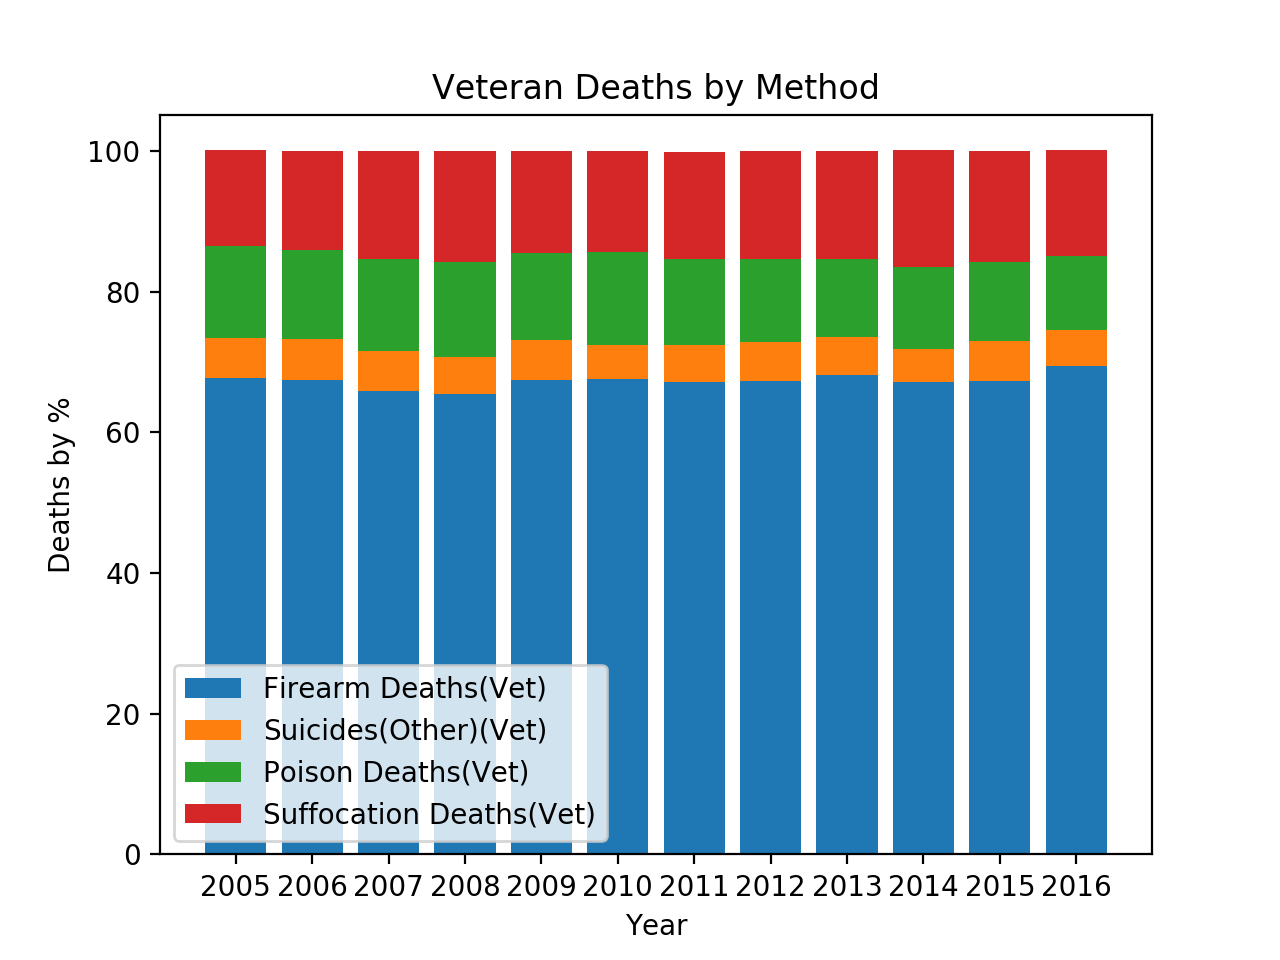

In [22]:
# plot the data
# Veteran Graph
plt.figure()
plt.bar(ind,vetFirearm,label="Firearm Deaths(Vet)")
plt.bar(ind,vetOther,label="Suicides(Other)(Vet)",bottom=vetFirearm)
plt.bar(ind,vetPoison,label="Poison Deaths(Vet)",bottom=vetOther+vetFirearm)
plt.bar(ind,vetSuffocation,label="Suffocation Deaths(Vet)",bottom=vetPoison+vetOther+vetFirearm)

# Labels
plt.ylabel('Deaths by %')
plt.xlabel('Year')
plt.title('Veteran Deaths by Method')
plt.xticks(ind,years)
plt.legend(loc="best")

# show graph
plt.show()

# Save Figure
plt.savefig("./Method_Vet.png")

<IPython.core.display.Javascript object>


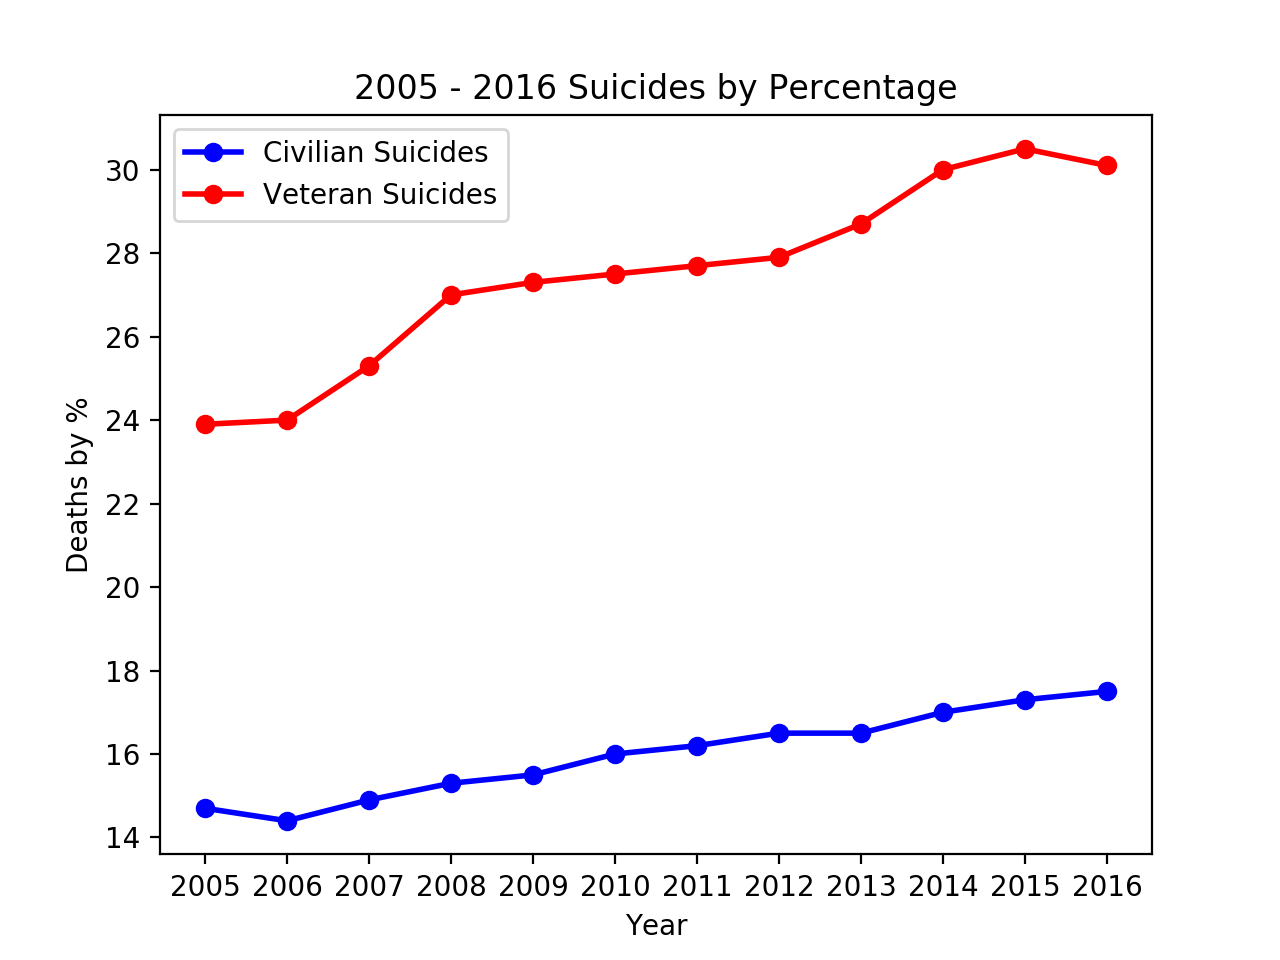

In [23]:
# Line Graph to show percentage of suicides between civilian and veteran between 2005 - 2016
# prepare data
plt.figure()
x_axis=np.arange(2005,2017,1)
civ_points=[14.7,14.4,14.9,15.3,15.5,16.0,16.2,16.5,16.5,17.0,17.3,17.5]
vet_points=[23.9,24.0,25.3,27.0,27.3,27.5,27.7,27.9,28.7,30.0,30.5,30.1]

# Labels
plt.ylabel('Deaths by %')
plt.xlabel('Year')
plt.title('2005 - 2016 Suicides by Percentage')
plt.xticks(x_axis)

# Plot Graph
plt.plot(x_axis,civ_points,linewidth=2,marker="o",color="blue")
plt.plot(x_axis,vet_points,linewidth=2,marker="o",color="red")
plt.legend(["Civilian Suicides","Veteran Suicides"],loc="best")

# Show Graph
plt.show()

# Save Figure
plt.savefig("./Suicides_Line_Graph.png")

# Millenial Suicide Rates

In [24]:
# Veteran and General Population Suicides by age
# rename ve_tage_df
millennial_df=vet_age_df2
millennial_df=millennial_df.drop(['Geographic\nRegion,\nBased on\nstate of\ndeath'],axis =1)
millennial_df.head()

,Year,State of Death,Age Group,Veteran Suicides,"Veteran Suicide Rate per 100,000",General Population Suicides,"General Population Rate per 100,000"
0,2005,Total U.S.,Total,"5,797",23.9,"31,610",14.7
1,2005,Total U.S.,18-34,544,25.2,"8,455",13.1
2,2005,Total U.S.,35-54,"2,063",29.0,"13,541",15.9
3,2005,Total U.S.,55-74,"1,868",18.7,"6,554",13.5
4,2005,Total U.S.,75+,"1,319",26.3,"3,060",18.7


In [25]:
# Convert object data type to string
millennial_df['Age\nGroup'].astype(str)
millennial_df.dtypes

Year                                       int64
State of Death                            object
Age\nGroup                                object
Veteran\nSuicides                         object
Veteran\nSuicide\nRate\nper\n100,000      object
General\nPopulation\nSuicides             object
General\nPopulation\nRate per\n100,000    object
dtype: object

In [26]:
# Convert object data type to int
millennial_df[['Veteran\nSuicide\nRate\nper\n100,000','General\nPopulation\nRate per\n100,000']].astype(float)
millennial_df.dtypes

Year                                       int64
State of Death                            object
Age\nGroup                                object
Veteran\nSuicides                         object
Veteran\nSuicide\nRate\nper\n100,000      object
General\nPopulation\nSuicides             object
General\nPopulation\nRate per\n100,000    object
dtype: object

In [27]:
# Convert object data type to int64
millennial_df.replace(',', '',regex=True, inplace=True)
millennial_df.head()

,Year,State of Death,Age Group,Veteran Suicides,"Veteran Suicide Rate per 100,000",General Population Suicides,"General Population Rate per 100,000"
0,2005,Total U.S.,Total,5797,23.9,31610,14.7
1,2005,Total U.S.,18-34,544,25.2,8455,13.1
2,2005,Total U.S.,35-54,2063,29.0,13541,15.9
3,2005,Total U.S.,55-74,1868,18.7,6554,13.5
4,2005,Total U.S.,75+,1319,26.3,3060,18.7


In [28]:
# Convert object data type to string
millennial_df['Veteran\nSuicides']=millennial_df['Veteran\nSuicides'].astype('int64')
millennial_df['Veteran\nSuicide\nRate\nper\n100,000']=millennial_df['Veteran\nSuicide\nRate\nper\n100,000'].astype('float')
millennial_df['General\nPopulation\nSuicides']=millennial_df['General\nPopulation\nSuicides'].astype('int64')
millennial_df['General\nPopulation\nRate per\n100,000']=millennial_df['General\nPopulation\nRate per\n100,000'].astype('float')
millennial_df.dtypes

Year                                        int64
State of Death                             object
Age\nGroup                                 object
Veteran\nSuicides                           int64
Veteran\nSuicide\nRate\nper\n100,000      float64
General\nPopulation\nSuicides               int64
General\nPopulation\nRate per\n100,000    float64
dtype: object

In [29]:
# Pulling age group 18-34 into new dataframe
millennial_df2 = millennial_df.loc[millennial_df['Age\nGroup']=='18-34']
millennial_df2.head()

,Year,State of Death,Age Group,Veteran Suicides,"Veteran Suicide Rate per 100,000",General Population Suicides,"General Population Rate per 100,000"
1,2005,Total U.S.,18-34,544,25.2,8455,13.1
281,2006,Total U.S.,18-34,482,22.7,8453,12.3
561,2007,Total U.S.,18-34,525,25.0,8764,12.7
841,2008,Total U.S.,18-34,560,26.8,8835,12.7
1121,2009,Total U.S.,18-34,553,26.4,8898,12.5


In [30]:
# List new dataframe
millennial_df2.index=millennial_df2['Year']
list(millennial_df2)

['Year',
 'State of Death',
 'Age\nGroup',
 'Veteran\nSuicides',
 'Veteran\nSuicide\nRate\nper\n100,000',
 'General\nPopulation\nSuicides',
 'General\nPopulation\nRate per\n100,000']

<IPython.core.display.Javascript object>


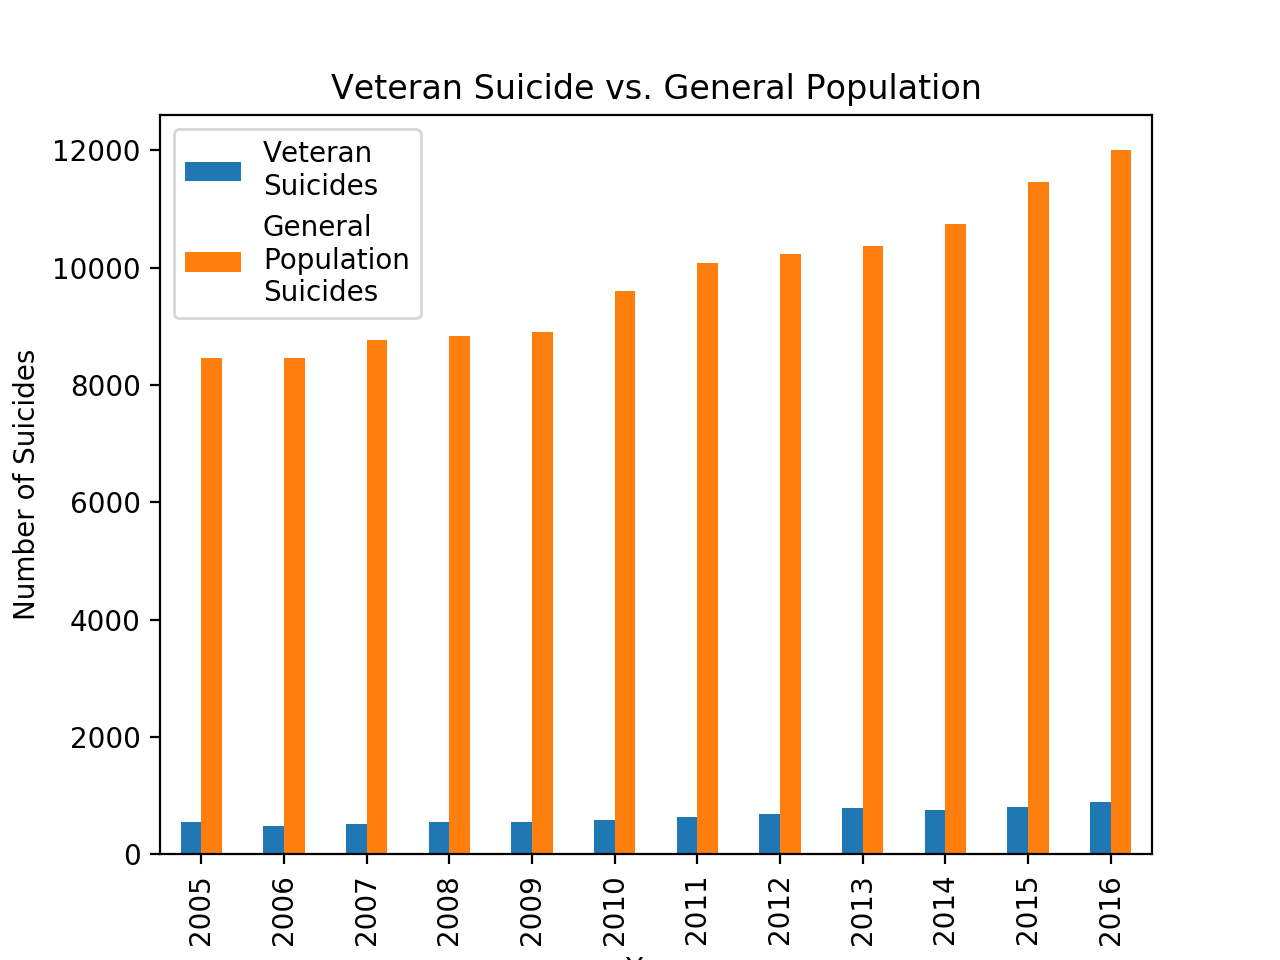

In [31]:
# Total Millennial Veteran Suicides vs Total General Population Sucides
ax = millennial_df2[['Veteran\nSuicides','General\nPopulation\nSuicides']].plot(kind='bar')
ax.set(title = 'Veteran Suicide vs. General Population',
       xlabel = 'Year',
       ylabel = 'Number of Suicides')
ax.legend(loc = 'best', frameon=True)

# Save the Figure
plt.savefig("./Total Millennial Veteran Suicide vs. General Population.png",bbox_inches='tight')

<IPython.core.display.Javascript object>


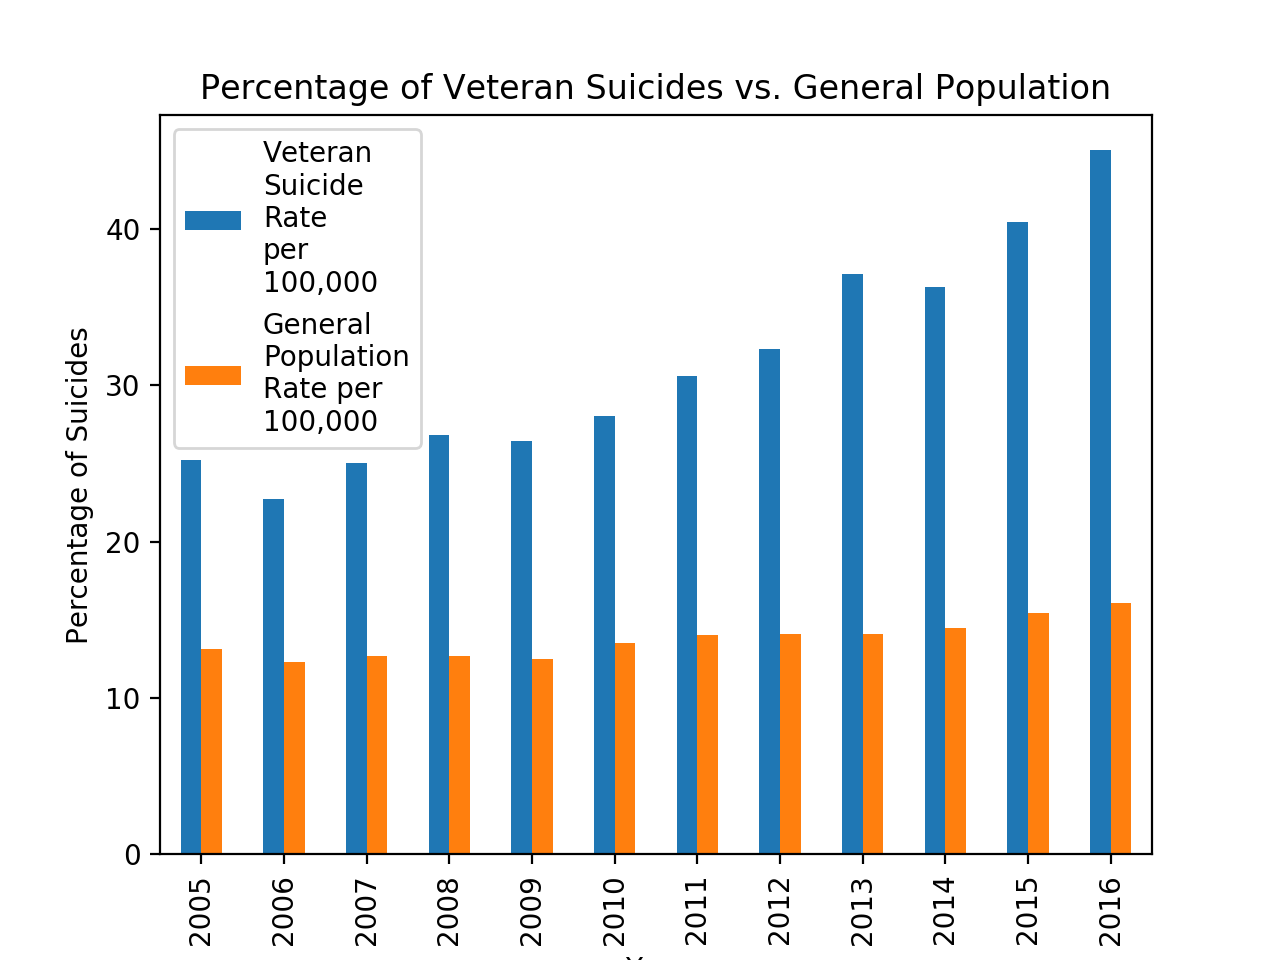

In [32]:
# Percentage of Millennial Veteran Suicides vs General Population Sucides per 100,000
ax = millennial_df2[['Veteran\nSuicide\nRate\nper\n100,000','General\nPopulation\nRate per\n100,000']].plot(kind='bar')
ax.set(title = 'Percentage of Veteran Suicides vs. General Population',
       xlabel = 'Year',
       ylabel = 'Percentage of Suicides')
ax.legend(loc = 'best', frameon=True)

# Save the Figure
plt.savefig("./Percentage Millennial Veteran Suicide vs. General Population.png",bbox_inches='tight')